In [41]:
from tkinter import *
from tkinter.ttk import *
from tkinter import filedialog
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
import pandas as pd
from PIL import ImageTk, Image
from matplotlib import pyplot as plt
import webbrowser
import os
import warnings
import openpyxl

warnings.filterwarnings("ignore")

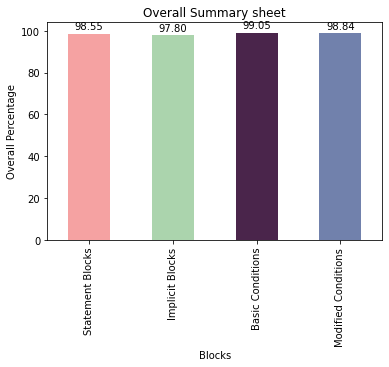

In [42]:


master = Tk()

excel_files = []  # list which contains excel files present in the folder

# sets the geometry of main
# root window
master.title("SCA tool Analysis")
master.geometry("350x330")


# function to open a new window
# on a button click
def openNewWindow():
    newWindow = Toplevel(master)
    newWindow.title("New Window")
    newWindow.geometry("550x830")
    newWindow.title("SCA Bar Graph")

    df_dict = open_excel(excel_files)
    new_df = open_excel_dataframe(df_dict)
    percent_graph(new_df,'file1')
    
#     get_data()
    
    image1 = Image.open("file1xpi.png")
    resize_image = image1.resize((480, 480))
    test = ImageTk.PhotoImage(resize_image)
    label1 = Label(newWindow, image=test)
    label1.image = test
    text = Label(newWindow, text="Source Code Files: ",font='Helvetica 14 bold').place(x=75, y=500)
    text1 = Label(newWindow, text="Total Number of source code files : ",font='Helvetica 12 bold').place(x=75, y=540)
    text2 = Label(newWindow, text="Number of files fully covered : ",font='Helvetica 12 bold').place(x=75, y=580)
    text3 = Label(newWindow, text="Number of files Partially covered : ",font='Helvetica 12 bold').place(x=75, y=620)
    
    
    
    label1.pack()



# functioon to select the path of excel files present in the directory
def path_excel():
    global excel_files
    excelExts = [".xlsm"]
    directory = filedialog.askdirectory()
    folderPath.set(directory)
    os.chdir(directory)
    excel_files = [file for file in os.listdir(directory) if os.path.splitext(file)[1].lower() in excelExts]
    filePath_a.set(excel_files[0])
    filePath_b.set(excel_files[1])
    filePath_c.set(excel_files[2])
    filePath_d.set(excel_files[3])
    
def open_excel(excel_files):
    df_dict = {}
    i = 1
    for f in excel_files:
        df = pd.read_excel(f, sheet_name='Summary', index_col=None)
        df1 = df.loc[0:3]
        # df1.set_index('Unnamed: 0', inplace=True)
        # df1.dropna(inplace=True)
        df_dict[i] = df1
        i = i + 1
    return df_dict


def open_excel_dataframe(df_dict):
    new_df = pd.DataFrame(index=df_dict[1]['Unnamed: 0'], columns=['Total Nodes', 'Hit'])
    new_df.fillna(0, inplace=True)
    for i in range(1, 2):
        df_dict[i].set_index('Unnamed: 0', inplace=True)
        new_df["Total Nodes"] += df_dict[i]['Total Nodes']
        new_df["Hit"] += df_dict[i]['Hit']
    new_df['Percentage']=(new_df['Hit']/ new_df['Total Nodes'])*100
    return new_df


def percent_graph(new_df,imagename):
    ax = new_df['Percentage'].plot(kind="bar",color=['#F5A2A2', '#ABD4AD', '#4A254B', '#7181AC'])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(format(p.get_height(),'.2f'), (x + width/2, y + height*1.02), ha='center')
    plt.title("Overall Summary sheet")
    plt.xlabel("Blocks")
    plt.ylabel("Overall Percentage")
    plt.savefig(imagename + "xpi.png", dpi=300, bbox_inches='tight')



empty_dict = {}
s = []

def multiple_excel(excel_files):
    for individual in excel_files:
        wb = openpyxl.load_workbook(individual)
        for sheets in wb.sheetnames[4:]:
            df = pd.read_excel(individual, sheet_name=sheets, index_col=None)
            df1 = df.loc[[5]]
            xdf = df1.loc[:,'Unnamed: 0' : 'Hit']
        # df1.set_index('Unnamed: 0', inplace=True)
        # df1.dropna(inplace=True)
            empty_dict[sheets] = xdf
            s.append(sheets)
    return empty_dict

def get_data():
    counts = []
    empty_dict = multiple_excel(excel_files)
    for sheets in s:
        res_df = empty_dict[sheets]
        res_df['t-h']=res_df['Total Nodes'] - res_df['Hit']
        counts.append(res_df[res_df['t-h']==0].shape[0])
    num = counts.count(1)

    print("Source Code Files: \n")
    print("Total Number of source code files : ",len(s))
    print("Number of files fully covered : ",num)
    print("Number of files Partially covered : ",(len(s) - num))

folderPath = StringVar()

filePath_a = StringVar()
filePath_b = StringVar()
filePath_c = StringVar()
filePath_d = StringVar()

E1 = Entry(master, textvariable=folderPath)
E1.place(x=120, y=20)
btn1 = Button(master, text="Select the Folder", command=path_excel)
btn1.place(x=10, y=20)
# btn1.pack(pady = 10)


E2 = Entry(master, textvariable=filePath_a)
E2.place(x=120, y=20 + 50)
btn2 = Button(master, text="Graph", command=openNewWindow)
btn2.place(x=200, y=280)
# btn2.pack(pady = 10)


E3 = Entry(master, textvariable=filePath_b)
E3.place(x=120, y=20 + 100)
# btn3 = Button(master, text="Percent Graph", command=openNewWindow1)
# btn3.place(x=75, y=280)
# # btn3.pack(pady = 10)


E4 = Entry(master, textvariable=filePath_c)
E4.place(x=120, y=20 + 150)
# btn4 = Button(master, text ="File3", command = openNewWindow3)
# btn4.place(x=10, y=20+150)
# #btn4.pack(pady = 10)


E5 = Entry(master, textvariable=filePath_d)
E5.place(x=120, y=20 + 200)
# btn5 = Button(master, text ="File4", command = openNewWindow4)
# btn5.place(x=10, y=20+200)
# #btn5.pack(pady = 10)



mainloop()

In [38]:
from tkinter import *
root=Tk()
def retrieve_input():
    inputValue=textBox.get("1.0","end-1c")
    print(inputValue)

textBox=Text(root, height=2, width=10)
textBox.pack()
buttonCommit=Button(root, height=1, width=10, text="Commit", 
                    command=lambda: retrieve_input())
#command=lambda: retrieve_input() >>> just means do this when i press the button
buttonCommit.pack()

mainloop()